# Postmortem Alzheimer's disease brains: Hisayama study

---

## Introdução

### Descrição da doença

A doença do Alzheimer é uma condição neurodegenerativa crónica que afeta a memória, o pensamento e o comportamento. É considerada a causa mais comum de demência, correspondendo a cerca de 60-70% dos casos, sendo a sétima maior causa de morte e de uma das maiores causas de dependência na população mais envelhecida. Segundos dados recolhidos pela OMS, é estimada uma incidência mundial superior a 55 milhões de pessoas com um aumento anual de 10 milhões de novos casos por ano. Relativamente a Portugal, segundo a OCDE, este país é considerado o 4º país com mais casos por cada mil habitantes, apresentado um prevalência média de 19,9 casos por cada mil habitantes (em comparação a prevalência média da OCDE 14,4 casos/mil habitantes).
Atualmente sabe-se que o risco de obtenção desta doença neurodegenerativa agrava-se, não só, com o aumento da idade, como também pela presença de doenças como diabetes, hipertensão, obesidade, depressão, entre outros fatores. Desta forma seria de esperar que o risco de obtenção desta doença pudesse ser diminuído pela prática regular de exercício físico, controlo de obesidade e adoção de um estilo de vida saudável. No entanto, estudos efetuados não revelam fortes evidências que apoiem estas recomendações. 
As causas inerentes aos casos de Alzheimer ainda são uma incógnita, tendo alguns estudos demonstrado fores evidências de hereditariedade genética associada a cerca de 1-5% dos casos averiguados.
Atualmente não existe qualquer tipo de medicamento ou tratamento que consiga travar ou reverter esta doença, embora alguns consigam melhorar temporariamente os sintomas. 

### Hisayama Study

O Estudo Hisayama é um estudo de coorte prospetivo de base populacional, consuzido na cidade de Hisayama, no Japão, a partir do ano de 1961, tendo contando com a participação de 70-80% dos residentes desta região. Este estudo teve como objetivo avaliar o risco de diferentes fatores relacionados com o estilo de vida adotado no desenvolvimento de doenças como a diabetes, demência e hipertensão. Uma das características que conferem a este estudo particular relevância assenta no banco de dados post-mortem, que validou a precisão do diagnóstico de doenças cerebrovasculares, cardíacas e a tendência dos perfis da doença.
Desta forma, este estudo é um dos mais completos e relavantes na área,fornecendo evidências sólidas do contributo de diversos fatores inerentes ao estilo de vida adotado pelo indivíduo e o desenvolvimento de algumas doenças, das quais a demência. 

### Dataset utilizado  

O dataset selecionado tem por base o Estudo de Hisayama, utilizando dados retirados da análise de tecidos cerebrais post-mortem (córtex frontal, temporal e hipocampo) de homens e mulheres que participaram neste estudo e que foram diagnosticados patologicamente com a doença do Alzheimer, ou um distúrbio semelhante. Desta forma, os dados deste dataset apresentam informações sobre os mecanismos moleculares subjacentes à patologia cerebral do Alzheimer.

O dataset apresenta dois ficheiros, um referente aos dados (gds4758.csv), que contém valores de expressão genética dos diferentes pacientes para diferentes genes que se encontram associados ao Alzheimer, e outro referente aos meta-dados (meta-gds4758.csv). Este último, apresenta dados referentes a variáveis essenciais, que se encontram dispostas em colunas:
- Sample: Dado pela forma GSMXXXXXXX, permite identificar a amostra.
- Disease.state: Permite identificar se a amostra está associada à doença do Alzheimer ou não.
- Tissue: Identifica o tecido de onde foi retirada a amostra ( córtex frontal, córtex temporal ou hipocampo).
- Gender: identifica o género da pessoa de onde foi recolhida a amostra (masculino ou feminino).
- Description: Descrição adicional sobre cada amostra.


Dataset disponível em: https://www.ncbi.nlm.nih.gov/sites/GDSbrowser?acc=GDS4758

### Objetivos do trabalho 

- Utilização de técnicas de machine learning para previsão do desenvolvimento da doença do Alzheimer, com base nos valores de expressão genética para os diferentes pacientes;

- Previsão do tecido de onde deverá ter sido retirada a amostra, com base nos valores de expressão genética para os diferentes pacientes.

---

## Secção 1: Exploração do Dataset pela análise dos dados e metadados

### 1.1. Leitura dos Dados e Meta-dados

In [1]:
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

Em primeiro lugar procede-se à abertura do dataset e  a uma visualização geral dos dados.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sn

%matplotlib inline
import matplotlib.pyplot as plt

# Opening the dataset with pandas
data_all = pd.read_csv("gds4758.csv", sep=',', index_col = 0)
data_all.head()

,GSM907858,GSM907859,GSM907860,GSM907854,GSM907855,GSM907856,GSM907857,GSM907825,GSM907828,GSM907832,...,GSM907823,GSM907808,GSM907809,GSM907810,GSM907811,GSM907812,GSM907815,GSM907817,GSM907821,GSM907824
7896736,7.98001,7.76415,7.54313,7.84693,7.49627,7.92109,7.75988,7.23496,7.77429,7.67991,...,7.25483,7.37792,7.20859,7.10271,7.07700,6.95540,7.23591,7.17572,7.01313,6.91400
7896738,5.42206,5.59312,4.77380,4.99679,5.27858,6.12362,5.10448,4.78555,4.29300,4.75807,...,4.70955,4.89731,4.73950,4.77599,4.49829,5.44083,6.18140,4.87187,4.38672,5.30893
7896740,6.74531,7.63617,6.46318,6.50367,6.47790,7.64459,6.17849,5.63094,5.86639,5.93404,...,5.67810,5.91919,6.03426,5.93513,5.79917,6.67070,7.57895,5.91335,5.32446,5.93580
7896742,9.36478,9.65509,9.67887,9.70713,9.60505,9.46327,9.68657,9.84651,9.48611,9.77404,...,9.20082,9.47752,9.43285,9.26028,9.78053,9.88431,9.32089,9.51553,9.45983,9.32106
7896744,8.22276,8.20467,7.77943,7.97956,7.72075,8.23660,6.86347,7.76701,7.35602,7.51173,...,6.19080,7.81728,7.35427,7.04910,7.32651,7.61803,8.20924,6.48359,7.09810,6.80678


Verifica-se que as linhas correspondem aos pacientes utilizados para o estudo e, nas colunas, os genes relevantes. O corpo da matriz é composto por um valor referente à expressão genética.

Tendo em conta que o passo anterior não permite ter uma noção de toda a extensão do dataset, foi utilizada a ferramenta values.shape(), que permite obter o número de linhas e de colunas do nosso dataset. 

In [3]:
# tamanho do dataset: linhas=pacientes, colunas=genes
print(data_all.values.shape)

(33297, 79)


Daqui verifica-se que as linhas correspondem aos pacientes, existindo 33297 pacientes (homens e mulheres)  e nas colunas os diferentes genes (79 genes). 

De seguida procede-se à abertura do dataset referente aos meta-dados, efetuando-se os mesmo passos que foram utilizados anteriormente.

In [4]:
meta_all = pd.read_csv("meta-gds4758.csv", sep = ",", index_col = 0)
meta_all.head()

,sample,disease.state,tissue,gender,description
GSM907858,GSM907858,Alzheimer's disease,hippocampus,male,"Value for GSM907858: AD_HI, biological rep5; s..."
GSM907859,GSM907859,Alzheimer's disease,hippocampus,male,"Value for GSM907859: AD_HI, biological rep6; s..."
GSM907860,GSM907860,Alzheimer's disease,hippocampus,male,"Value for GSM907860: AD_HI, biological rep7; s..."
GSM907854,GSM907854,Alzheimer's disease,hippocampus,female,"Value for GSM907854: AD_HI, biological rep1; s..."
GSM907855,GSM907855,Alzheimer's disease,hippocampus,female,"Value for GSM907855: AD_HI, biological rep2; s..."


Da visualização dos meta-dados, podemos verificar que as diferentes colunas apresentam informações essenciais relativas a cada um dos genes utilizados no estudo, tais como: a identificação da amostra, o facto de ser ou não um gene associado à doença do Alzheimer, o tecido onde a sua expressão genética é maior, o género do indivíduo e uma breve descrição.

In [5]:
# tamanho da meta_data
print(meta_all.values.shape)

(79, 5)


A metadata é composta por 79 genes e 5 colunas com diferentes informações associadas a cada um deles (sample, estado da doença, tecido, género e descrição).

### 1.2. Exploração dos dados e meta-dados

A próxima etapa tem como objetivo explorar os dados do dataset principal.

### 1.2.1. Exploração do Dataset

Em primeiro lugar procede-se à descrição dos dados relativos ao genes (a matriz dos dados deve apresentar os genes nas colunas).

In [6]:
data_all.describe()

,GSM907858,GSM907859,GSM907860,GSM907854,GSM907855,GSM907856,GSM907857,GSM907825,GSM907828,GSM907832,...,GSM907823,GSM907808,GSM907809,GSM907810,GSM907811,GSM907812,GSM907815,GSM907817,GSM907821,GSM907824
count,33297.000000,33297.000000,33297.000000,33297.000000,33297.000000,33297.000000,33297.000000,33297.000000,33297.000000,33297.000000,...,33297.000000,33297.000000,33297.000000,33297.000000,33297.000000,33297.000000,33297.000000,33297.000000,33297.000000,33297.000000
mean,7.479263,7.474832,7.480576,7.460422,7.471921,7.481591,7.489707,7.488842,7.503102,7.486217,...,7.450923,7.492268,7.448367,7.466426,7.455171,7.487544,7.443075,7.449897,7.448544,7.435333
std,2.107821,2.088814,2.097620,2.133745,2.099597,2.096785,2.095882,2.182299,2.165019,2.179870,...,2.078882,2.055549,2.086622,2.069110,2.109427,2.048433,2.111164,2.110475,2.096468,2.123418
min,1.347460,1.258460,1.359360,1.194040,1.258460,1.064550,1.194040,1.173120,1.101530,1.233100,...,1.259710,1.237220,1.190460,1.382410,1.351570,1.329990,1.393670,1.219520,1.229330,1.211350
25%,6.197580,6.254010,6.214780,6.127840,6.164550,6.213010,6.222420,6.104170,6.158450,6.144360,...,6.178570,6.268220,6.212190,6.236000,6.161320,6.254290,6.143710,6.121110,6.148660,6.080080
50%,7.588790,7.578940,7.586290,7.567520,7.576180,7.579970,7.624780,7.600450,7.608120,7.614330,...,7.546520,7.595400,7.564980,7.575470,7.534780,7.595180,7.516370,7.528720,7.541610,7.513190
75%,8.837570,8.781160,8.824550,8.849780,8.841430,8.811790,8.811510,8.956660,8.927720,8.900230,...,8.804370,8.804420,8.770880,8.769060,8.819990,8.773480,8.815770,8.832880,8.817730,8.858490
max,14.656100,14.576000,14.451700,14.578500,14.639000,14.660500,14.673500,14.659900,14.688400,14.665000,...,14.644900,14.578700,14.549200,14.569600,14.598000,14.562600,14.600800,14.540900,14.545800,14.621900


Para cada um dos genes foi calculada a soma das expressões genéticas, a média, desvio-padrão, máximo, mínimo e quartis 25,50 e 75, cujos valores podem ser vizualizados na tabela acima.

De seguida realiza-se o mesmo processo, mas desta vez, utilizando a transposta da matriz, de forma a que os pacientes se encontrem nas colunas e, consequentemente, possibilitando a sua análise.

In [7]:
# Descrição da base de dados associada aos pacientes
data_transposed=data_all.transpose()
data_transposed

,7896736,7896738,7896740,7896742,7896744,7896746,7896748,7896750,7896752,7896754,...,7896721,7896722,7896723,7896724,7896725,7896726,7896727,7896728,7896729,7896730
GSM907858,7.98001,5.42206,6.74531,9.36478,8.22276,11.4596,11.5180,7.64615,11.3803,9.06383,...,3.76208,13.2728,8.97044,2.40846,6.51988,6.88170,11.0265,6.17211,4.13771,10.33020
GSM907859,7.76415,5.59312,7.63617,9.65509,8.20467,11.6957,12.0540,7.89694,11.7028,9.35470,...,3.66853,11.5884,8.92587,3.28424,6.53332,6.27732,12.1166,6.06534,3.13806,9.82129
GSM907860,7.54313,4.77380,6.46318,9.67887,7.77943,10.4939,11.7118,7.49320,10.7979,9.29488,...,4.87353,13.3604,8.85374,3.62692,6.43675,7.12140,10.8153,5.36129,3.89835,9.86729
GSM907854,7.84693,4.99679,6.50367,9.70713,7.97956,11.7290,10.8122,6.51592,10.6500,8.39569,...,4.01900,13.1274,8.91017,2.28737,6.24214,7.26194,10.9820,5.76673,4.15700,10.41410
GSM907855,7.49627,5.27858,6.47790,9.60505,7.72075,11.7883,12.6071,8.86244,11.9877,8.90165,...,3.68669,13.2012,8.84725,2.05437,6.33313,6.90213,11.1596,5.52088,3.27257,10.24450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM907812,6.95540,5.44083,6.67070,9.88431,7.61803,12.0339,12.0035,8.61276,11.3833,8.80323,...,3.86021,11.1038,8.79121,2.75378,6.38470,6.75482,12.1198,5.38678,3.21083,9.42717
GSM907815,7.23591,6.18140,7.57895,9.32089,8.20924,11.8705,12.4950,9.36375,11.6904,8.31892,...,4.06562,11.4758,8.61863,4.37118,6.15693,7.26043,11.8754,6.40212,2.95142,10.26290
GSM907817,7.17572,4.87187,5.91335,9.51553,6.48359,11.6622,12.1656,8.61259,11.6173,9.13228,...,4.05374,12.1153,8.60583,2.49209,6.62890,6.98721,12.2625,6.44424,4.49731,9.83096
GSM907821,7.01313,4.38672,5.32446,9.45983,7.09810,11.9706,11.5921,7.96598,11.2278,9.31604,...,4.31914,11.6207,8.79623,2.32753,5.90434,6.89384,11.9402,7.07677,3.59737,9.31227


In [8]:
data_transposed.describe()

,7896736,7896738,7896740,7896742,7896744,7896746,7896748,7896750,7896752,7896754,...,7896721,7896722,7896723,7896724,7896725,7896726,7896727,7896728,7896729,7896730
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,...,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,7.464399,5.056055,6.232128,9.503825,7.388344,11.630057,11.826729,8.032444,11.260077,9.021659,...,3.800022,12.127838,8.833544,2.541659,6.250148,6.732019,11.888461,5.605934,3.586849,9.782239
std,0.366657,0.559722,0.746407,0.216061,0.580854,0.292885,0.622878,0.741444,0.439905,0.298644,...,0.656291,0.603434,0.138185,0.516889,0.195471,0.415352,0.469998,0.496740,0.512677,0.483195
min,6.790800,4.271100,5.113600,8.928650,5.636290,10.493900,9.681980,6.421820,10.250200,8.220070,...,2.267250,11.103800,8.487390,1.690070,5.783230,5.382480,9.796280,4.582190,2.442480,8.746000
25%,7.192155,4.705145,5.676070,9.377095,7.056825,11.443050,11.564350,7.505510,10.904350,8.812560,...,3.346925,11.615050,8.752520,2.207775,6.121340,6.484070,11.878900,5.268570,3.216080,9.496825
50%,7.496270,4.897310,6.000340,9.514190,7.463380,11.614100,11.966900,8.006670,11.309300,9.055490,...,3.860210,12.108900,8.848400,2.492090,6.251580,6.762460,12.000400,5.592600,3.485080,9.772240
75%,7.763465,5.309310,6.699895,9.628880,7.804480,11.831600,12.248600,8.543390,11.622450,9.250055,...,4.216225,12.589750,8.934015,2.795625,6.337400,6.985195,12.121450,5.898370,3.895520,10.062350
max,8.199800,6.673510,8.338200,10.010000,8.443910,12.362000,12.898600,9.631730,12.017800,9.647530,...,5.842170,13.374500,9.123590,4.371180,6.884280,7.521790,12.436600,7.076770,5.133590,11.145200


Na tabela acima podemos verificar a soma total dos valores de expressão genética obtidos para od diferentes pacientes utilizados no estudo, como também a média, desvio-padrão, máximo, mínimo e quartis 25, 50 e 75.

### 1.2.2. Exploração dos meta-dados

De seguida foi efetuada uma exploração mais detalhada dos meta-dados, cuja visualização geral se encontra na seguinte tabela.

In [9]:
meta_all.head()

,sample,disease.state,tissue,gender,description
GSM907858,GSM907858,Alzheimer's disease,hippocampus,male,"Value for GSM907858: AD_HI, biological rep5; s..."
GSM907859,GSM907859,Alzheimer's disease,hippocampus,male,"Value for GSM907859: AD_HI, biological rep6; s..."
GSM907860,GSM907860,Alzheimer's disease,hippocampus,male,"Value for GSM907860: AD_HI, biological rep7; s..."
GSM907854,GSM907854,Alzheimer's disease,hippocampus,female,"Value for GSM907854: AD_HI, biological rep1; s..."
GSM907855,GSM907855,Alzheimer's disease,hippocampus,female,"Value for GSM907855: AD_HI, biological rep2; s..."


In [10]:
meta_all.dtypes

sample           object
disease.state    object
tissue           object
gender           object
description      object
dtype: object

Daqui podemos verificar que todos os dados presentes no dataset dos meta-dados é do tipo "object" logo, todas as colunas contêm informações de texto e/ ou uma combinação de diferentes tipos de dados.

In [11]:
meta_all.describe(include = "all")

,sample,disease.state,tissue,gender,description
count,79,79,79,79,79
unique,79,2,3,2,79
top,GSM907858,non-Alzheimer's disease,frontal cortex,female,"Value for GSM907858: AD_HI, biological rep5; s..."
freq,1,47,33,42,1


Da descrição realizada dos meta-dados, verifica-se a existência de 79 amostras distintas de genes ("sample"). 

A variável "disease.state" também é composta por 79 amostras, podendo ser representado por dois valores distintos. Para além disso, verifica-se uma maior ocorrência de amostras não identificadoras da doença do Alzeihmer, com 47 amostras. Daqui podemos retirar que existem 22 amostras de genes que identificam esta doença. 

Relativamente à variável "tissue", esta é composta por 79 amostras, que podem adotar 3 valores distintos, sendo o tecido do córtex frontal o mais comum, com 33 amostras. 

Relativamente à variável "description", podemos verificar a existência de 79 amostras únicas, o que acentua o facto de a cada amostra estar associada uma descrição.

### 1.3. Representação gráfica de meta-dados.

De seguida tornou-se importante verificar a proporção exata de cada valor para as diferentes variáveis e, como forma de permitir uma visualização mais rápida destes valores, procedeu-se à realização de um gráfico circular com a percentagem associada a cada uma. 

Representação da proporção de pacientes dos diferentes géneros. 

In [12]:
meta_all.groupby("gender").size() 

gender
female    42
male      37
dtype: int64

<Axes: >

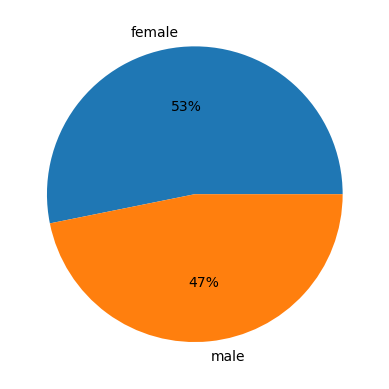

In [13]:
meta_all.groupby("gender").size().plot.pie(autopct='%.0f%%')

Tal como visto anteriormente, neste estudo foram consideradas mais amostras de mulheres do que de homens.

De seguida encontra-se efetuada a proporção de amostras que identificam a doença do Alzheimer e as que não.

In [14]:
meta_all.groupby("disease.state").size()

disease.state
Alzheimer's disease        32
non-Alzheimer's disease    47
dtype: int64

<Axes: >

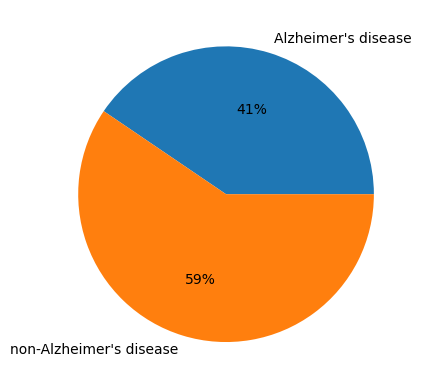

In [15]:
meta_all.groupby("disease.state").size().plot.pie(autopct='%.0f%%')

Pela análise do gráfico podemos verificar que 59% das amostras são amostras de genes que não estão associados à doença do Alzheimer.

Por fim, foi feito o mesmo procedimento para a variável "tissue".

In [16]:
meta_all.groupby("tissue").size()

tissue
frontal cortex     33
hippocampus        17
temporal cortex    29
dtype: int64

<Axes: >

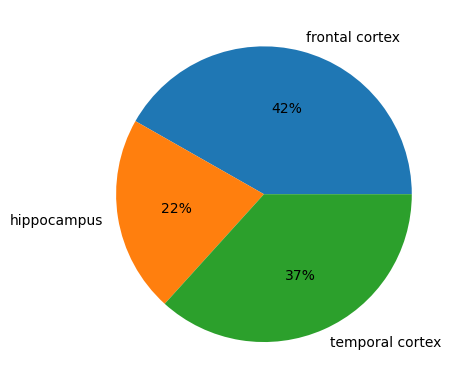

In [17]:
meta_all.groupby("tissue").size().plot.pie(autopct='%.0f%%')

Da análise do gráfico retira-se a existência de mais amostras relativas ao córtex frontal (42%), seguindo-se pelo córtex temporal, com 37% e, por fim, o hipocampo, com 22%.

### 1.4. Relações entre variáveis

Como forma a conseguir verificar a existência de alguma relação entre a progressão da doença do Alzheimer e o tecido onde se processa a alteração genética. Isto torna-se particularmente importante no sentido em que conseguindo associar uma maior tendência de progressão num determinado tecido, o diagnóstico ou predisposição para ter doença torna-se muito mais precoce.
Para tal é necessário agrupar, em primeiro lugar, os metadados por "disease.state" e contar o número de amostras pertencentes a cada um dos tecidos para a existência ou não da doença do Alzheimer.

In [18]:
group_by_disease=meta_all.groupby(['disease.state','tissue']).size().unstack()
group_by_disease

tissue,frontal cortex,hippocampus,temporal cortex
disease.state,,,
Alzheimer's disease,15,7,10
non-Alzheimer's disease,18,10,19


Para uma mais fácil visualização dos dados realizou-se um gráfico de barras.

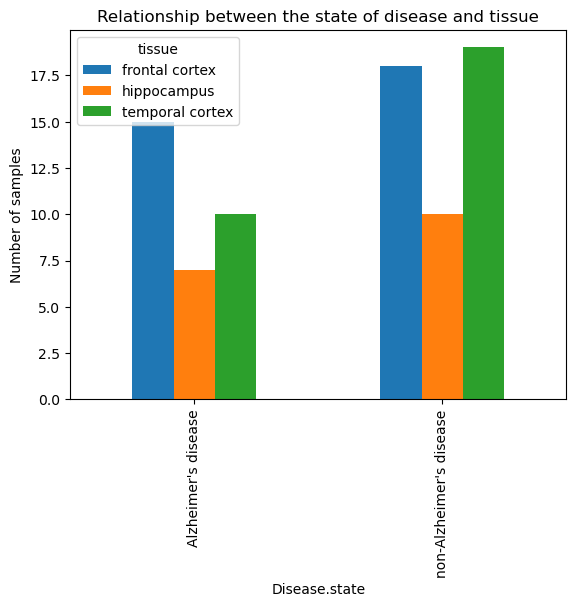

In [19]:
group_by_disease.plot.bar()

plt.title('Relationship between the state of disease and tissue')
plt.xlabel('Disease.state')
plt.ylabel ('Number of samples')
plt.legend(title='tissue', loc='upper left')

Pela análise deste gráfico podemos verificar que os genes expressos para doenças que não o Alzheimer apresentam maior prevalência no córtex temporal, em comparação com os que expressam esta doença. Em contrapartida, nos restantes tipos de tecidos, a prevalência destes dois grupos de genes é semelhante.
Deve-se, ainda salientar que, devido ao facto deste dataset ser relativamente pequeno não se pode fazer uma extrapolação generalista destas conclusões, devendo ser recolhidos mais amostras para este fim. 

Por outro lado, tornou-se essencial realizar também uma avaliação da relação entre a existência desta doença e o género da pessoa, como forma de verificar se haveria alguma diferença significativa, de onde pudessem ser retiradas conclusões acerca da predisposição ao desenvolvimento de Alzheimer por género. 

In [20]:
group_by_disease=meta_all.groupby(['disease.state','gender']).size().unstack()
group_by_disease

gender,female,male
disease.state,,
Alzheimer's disease,17,15
non-Alzheimer's disease,25,22


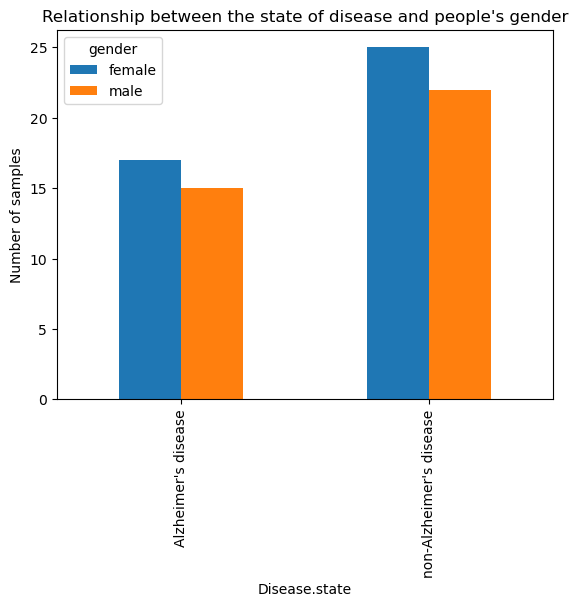

In [21]:
group_by_disease.plot.bar()

plt.title("Relationship between the state of disease and people's gender")
plt.xlabel('Disease.state')
plt.ylabel ('Number of samples')
plt.legend(title='gender', loc='upper left')

Pela análise do gráfico, podemos verificar que não existem diferenças significativas entre os géneros que pudessem levar à retirada de alguma conclusão sólida acerca desta predisposição de ter ou não Alzheimer consoante o género. No entanto verifica-se uma menor proporção de homens a desenvolver doença do Alzheimer ou semelhantes, na população tida em conta no estudo de Hisayama. 

### 1.5. Tratamento de Dados

### 1.5.1. Verificação da existência de valores nulos

In [22]:
data_all.isnull().sum().sum()

0

In [23]:
meta_all.isnull().sum().sum()

0

Não há missing values nos dois datasets

### 1.5.2. Análise de genes de maior relevância: Testes Estatísticos Univariados

A realização destes testes estatísticos permite a identificação dos genes com maior relevância para os dados. Para tal utilizam-se métodos de SelectKBest para avaliar cada uma das colunas (genes) individualmente, selecionando-se, por fim, os genes com uma melhor pontuação. Neste caso, pretende-se selecionar os 10 genes com maior pontuação.

In [24]:
from sklearn.feature_selection import SelectKBest, f_classif
skb = SelectKBest(f_classif, k=10)

labels = data_all.iloc[:,0]
x_kbest = skb.fit_transform(data_all.iloc[:,1:], labels)

columns_best = data_all[skb.get_feature_names_out()]
data_kbest = pd.DataFrame(x_kbest, index=data_all.index, columns=columns_best.columns)
print(data_kbest.shape)
data_kbest.head()

(33297, 10)


,GSM907859,GSM907854,GSM907855,GSM907856,GSM907868,GSM907861,GSM907866,GSM907867,GSM907848,GSM907850
7896736,7.76415,7.84693,7.49627,7.92109,7.63609,7.85956,7.56421,7.53737,7.54838,7.80269
7896738,5.59312,4.99679,5.27858,6.12362,4.70477,4.27110,5.04284,4.93904,4.69673,4.57663
7896740,7.63617,6.50367,6.47790,7.64459,5.83269,5.61101,7.08469,6.24267,6.00034,5.13058
7896742,9.65509,9.70713,9.60505,9.46327,9.29908,9.25257,9.65281,9.53904,9.61598,9.50918
7896744,8.20467,7.97956,7.72075,8.23660,6.93351,7.40310,7.54853,6.77204,8.11177,7.06455


### 1.5.2.1. Escolha dos meta-dados de maior relevância

O objetivo principal será conseguir prever a a existência de ou não da doença do Alzheimer, pelo que os dados considerado mais importantesforam os relativos ao "disease.state", seguido do "tissue" e, por fim o "gender".

---

## Secção 2: Redução de Dimensionalidade e clustering de dados

Em primeiro lugar foi necessário transformar os dados da base de dados numa matriz que pode ser utilizada para aplicar os modelos e fazer a análise estatística.

In [25]:
input_data = data_all.values 
input_data=input_data.transpose()
print(input_data.shape)
input_data

(79, 33297)


array([[ 7.98001,  5.42206,  6.74531, ...,  6.17211,  4.13771, 10.3302 ],
       [ 7.76415,  5.59312,  7.63617, ...,  6.06534,  3.13806,  9.82129],
       [ 7.54313,  4.7738 ,  6.46318, ...,  5.36129,  3.89835,  9.86729],
       ...,
       [ 7.17572,  4.87187,  5.91335, ...,  6.44424,  4.49731,  9.83096],
       [ 7.01313,  4.38672,  5.32446, ...,  7.07677,  3.59737,  9.31227],
       [ 6.914  ,  5.30893,  5.9358 , ...,  6.06081,  3.78006,  9.59383]])

### 2.1. Filtração dos dados

### 2.1.1. Filtração dos dados por variância

Com esta análise pretende-se identificar os genes que apresentam elevada variabilidade. O objetivo será eliminar todos os genes que apresentem uma variância inferior à média das variâncias.

In [26]:
# Permite calcular a variância associada a cada gene, bem como a média das variâncias.
variances = input_data.var(axis = 0) 

print(variances.shape)

medvar = variances.mean()
medvar

(33297,)


0.08948632599381982

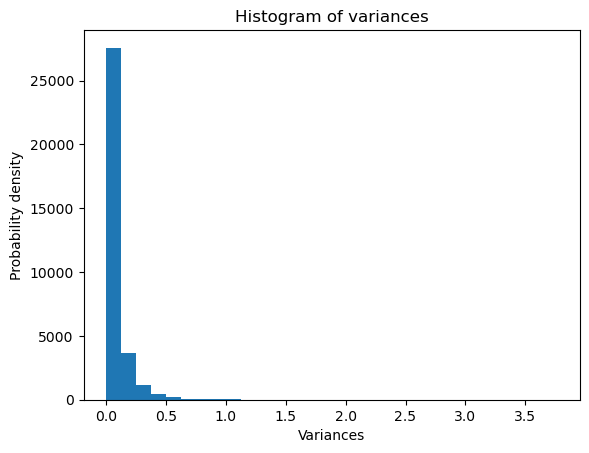

In [27]:
plt.hist(variances, bins = 30)
plt.xlabel('Variances')
plt.ylabel('Probability density')
plt.title(r'Histogram of variances')
plt.show()

In [28]:
from sklearn.feature_selection import VarianceThreshold
# vai remover todos os genes que se encontrem abaixo da variância
sel = VarianceThreshold(threshold= medvar)
input_filt = sel.fit_transform(input_data)
input_filt.shape

(79, 9153)

Utilizando o método da variância foram removidos 24144 (33297-9153) sujeitos que seriam pouco importantes e redundantes para a aplicação de modelos.

### 2.1.2. Filtração dos dados por percentil

O objetivo é identificar os genes expressos diferencialmente em relação à variável alvo, neste caso, disease.state. Para tal, utiliza-se a ANOVA, que seleciona os 10% recursos com um f_value maior, e retorna o nome das colunas que possuem valores de p inferiores a 5%. Significância estatística de 95%.

In [29]:
from sklearn.feature_selection import SelectPercentile, f_classif


seletor = SelectPercentile(f_classif,percentile=10)
output_data=meta_all.values[:,1]

seletor.fit_transform(input_filt,output_data)

genes_filtrados=np.where(seletor.pvalues_<0.05)
final_data=input_data.transpose()[genes_filtrados]
print(final_data.shape)




(2269, 79)


Com base no disease.state, foram eliminados 24196 sujeitos com dados redundantes.

# Aprendizagem não supervisionada

### 1. Análise da forma como amostras se organizam no espaço através do PCA

In [30]:
from sklearn import preprocessing

input_sc = preprocessing.scale(final_data).transpose()

print("Average: ", input_sc.mean())
print("Standard Deviation: ", input_sc.std())

Average:  -2.0612561302043063e-16
Standard Deviation:  0.9999999999999999


In [31]:
from sklearn.decomposition import PCA

pca = PCA(n_components=20)
X_r = pca.fit(input_sc).transform(input_sc)

print('Explained Variance: %s'% str(pca.explained_variance_ratio_))

pca.explained_variance_ratio_.sum()

Explained Variance: [0.16689814 0.11867185 0.08018991 0.04969823 0.04714901 0.03715335
 0.03558544 0.02838861 0.02465651 0.02271734 0.02053113 0.01943348
 0.0165573  0.01534831 0.01359539 0.01250016 0.01184256 0.0112459
 0.01072133 0.00972304]


0.7526069978134136

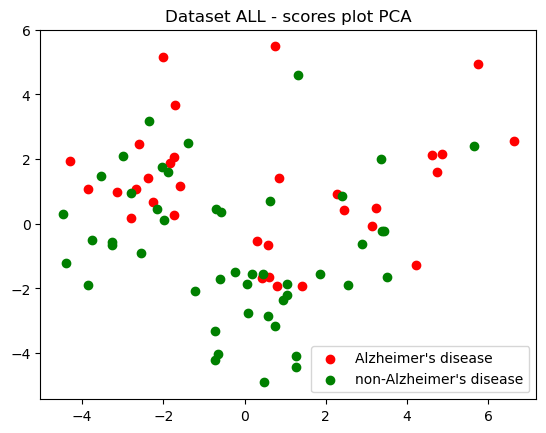

In [32]:
plt.figure()
for c, name in zip("rgb", ["Alzheimer's disease", "non-Alzheimer's disease"]):
    plt.scatter(X_r[output_data == name, 0], X_r[output_data == name, 1], c=c, label=name)
plt.legend()
plt.title('Dataset ALL - scores plot PCA')
plt.show()

In [33]:
output_tissue=meta_all.values[:,2]


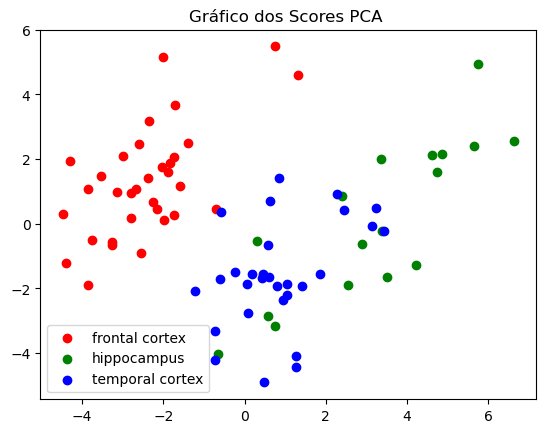

In [34]:
plt.figure()
for c, name in zip("rgb", ["frontal cortex", "hippocampus","temporal cortex"]):
    plt.scatter(X_r[output_tissue == name, 0], X_r[output_tissue == name, 1],c=c, label=name)
plt.legend()
plt.title('Gráfico dos Scores PCA ')
plt.show()

### 2. Criação de clusters: K-Means

In [35]:
from sklearn.cluster import KMeans

In [45]:
X_r = pd.DataFrame(X_r)
X_r = X_r.transpose()
X_r

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,4.855205,2.152870,1.055666,-0.096973,1.406526,-1.255204,1.084151,-2.477457,-0.262386,-0.210870,0.079183,0.706595,-0.612169,-0.840627,-1.599954,0.065429,-0.394791,-0.762782,0.718084,0.459085
1,0.315015,-0.531134,2.754669,-2.171962,0.623711,-0.607268,0.981012,-1.345775,1.334930,0.124621,-0.013285,0.713711,-2.112052,-1.582553,0.768629,-1.144914,0.296298,-0.089247,-0.360634,-0.447697
2,4.211498,-1.266832,2.085196,1.871576,-0.599137,-1.719706,3.169515,-0.305921,-0.166893,-1.554867,-1.106793,1.133689,-2.433677,2.242709,-0.746260,0.473268,-0.603983,0.793708,-0.424048,1.405728
3,4.611058,2.117375,-0.540793,0.757646,0.357161,-1.818939,0.549123,-0.234711,-0.400461,1.110610,0.024448,-0.757283,-0.586600,0.477183,1.367083,0.283638,-0.040130,-0.539679,-1.625031,0.007609
4,4.738050,1.607405,2.347204,0.949596,-1.574365,0.292008,-2.249275,-1.064270,0.011399,-0.101785,0.163522,0.811356,0.923239,-0.374653,-0.132694,-0.223518,-0.425591,-0.097614,-0.631969,0.046906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,-2.350389,3.170793,0.002252,-0.746442,-0.445462,0.998915,-1.103074,0.302876,-0.546561,1.665654,-0.542911,0.526497,-1.073134,0.030236,1.134997,0.395724,-0.436483,0.736256,0.065099,0.297835
75,1.325123,4.598141,0.762398,-1.363882,3.571038,2.431534,-0.475141,3.494774,-1.758306,-0.757088,0.955204,-0.813575,-0.262479,-0.148902,-0.153009,1.227632,-0.460218,-1.006774,0.123618,0.701731
76,-1.979979,0.124229,-1.413321,2.133575,0.154763,1.068449,1.208740,1.857100,1.406349,0.579987,0.610838,0.931404,0.627472,-0.528946,-0.462993,0.660014,-0.400237,-0.034812,-0.037691,-0.057976
77,-1.388505,2.509501,-2.335018,0.574255,2.151368,-0.674186,-1.207419,0.282871,-0.036390,0.253293,-0.902645,2.600655,0.066404,1.554688,0.433196,0.852518,1.570213,0.130743,-0.545002,1.097917


In [46]:
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(X_r)
kmeans.fit(X_r)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [47]:
kmeans_data = kmeans.transform(X_r)

In [48]:
meta_all['clusters'] = kmeans.labels_
mapping = {0:'hippocampus', 1:'frontal cortex', 2:'temporal cortex'}
meta_all['clusters'] = [mapping[i] for i in meta_all['clusters']]

In [49]:
meta_all

,sample,disease.state,tissue,gender,description,clusters
GSM907858,GSM907858,Alzheimer's disease,hippocampus,male,"Value for GSM907858: AD_HI, biological rep5; s...",frontal cortex
GSM907859,GSM907859,Alzheimer's disease,hippocampus,male,"Value for GSM907859: AD_HI, biological rep6; s...",temporal cortex
GSM907860,GSM907860,Alzheimer's disease,hippocampus,male,"Value for GSM907860: AD_HI, biological rep7; s...",frontal cortex
GSM907854,GSM907854,Alzheimer's disease,hippocampus,female,"Value for GSM907854: AD_HI, biological rep1; s...",frontal cortex
GSM907855,GSM907855,Alzheimer's disease,hippocampus,female,"Value for GSM907855: AD_HI, biological rep2; s...",frontal cortex
...,...,...,...,...,...,...
GSM907812,GSM907812,non-Alzheimer's disease,frontal cortex,female,"Value for GSM907812: non-AD_FC, biological rep...",hippocampus
GSM907815,GSM907815,non-Alzheimer's disease,frontal cortex,female,"Value for GSM907815: non-AD_FC, biological rep...",frontal cortex
GSM907817,GSM907817,non-Alzheimer's disease,frontal cortex,female,"Value for GSM907817: non-AD_FC, biological rep...",hippocampus
GSM907821,GSM907821,non-Alzheimer's disease,frontal cortex,female,"Value for GSM907821: non-AD_FC, biological rep...",hippocampus


### 3. Previsão de testes de treino

In [50]:
pd.crosstab(output_tissue, meta_all['clusters'])

clusters,frontal cortex,hippocampus,temporal cortex
row_0,,,
frontal cortex,1,32,0
hippocampus,13,0,4
temporal cortex,1,0,28


In [51]:
from sklearn import metrics

In [52]:
score = metrics.accuracy_score(output_tissue, meta_all['clusters'])
score

0.3670886075949367

### Interpretação dos resultados:

Através da interpretação dos resultados extraídos a partir dos métodos 'crosstab' e 'metrics.accuracy_score' conseguimos concluir que o método não supervisionado 'K-Means' consegue prever o tipo de tecido estudado com 92,4% de acuidade, provando-se assim um método aplicável à previsão desta variável noutros casos.

---

## Secção 3: Modelos de Aprendizagem Máquina 

### 3.1. Supervised machine learning

### Previsão do estado da doença

### Split para dados de treino e de teste

In [53]:
from sklearn.model_selection import train_test_split
input_class=final_data.transpose()
output_class= meta_all["disease.state"]

#30% para dados de teste, random_state se estiver a 0 dá sempre os mesmos dados para treino e para teste.
#se random_state não for referenciado obtemos diferentes conjuntos de teste e de treino em cada execução e fica fora do controle.
# temos de colocar stratify como o output_class caso contrário não vamos ter a mesma proporção de dados de treino e de teste.
train_in,test_in,train_out,test_out=train_test_split(
    input_class,output_class,test_size=0.3,random_state=30, stratify=output_class)


In [54]:
print("Input treino: ",train_in.shape)
print("Output treino: ",train_out.shape)

print("Input teste: ",test_in.shape)
print("Output teste", test_out.shape)

# Nota: o output deverá ser somente o valor previsto para o disease.state.

Input treino:  (55, 2269)
Output treino:  (55,)
Input teste:  (24, 2269)
Output teste (24,)


In [55]:
#Exemplo entrada
train_in

array([[9.1215 , 8.23862, 8.97261, ..., 8.57627, 9.40645, 8.00377],
       [9.43285, 7.15491, 8.62149, ..., 8.02487, 9.88513, 8.50175],
       [9.5066 , 7.12705, 9.08543, ..., 8.41331, 9.39954, 8.23673],
       ...,
       [9.55219, 8.69055, 9.13568, ..., 8.15902, 9.50424, 8.57545],
       [9.58462, 7.92568, 8.54794, ..., 8.2951 , 9.45384, 8.31072],
       [9.51419, 8.7087 , 9.3983 , ..., 8.73574, 9.27777, 8.16791]])

In [56]:
#Exemplo de saída 
train_out

GSM907870    non-Alzheimer's disease
GSM907809    non-Alzheimer's disease
GSM907838    non-Alzheimer's disease
GSM907843    non-Alzheimer's disease
GSM907859        Alzheimer's disease
GSM907850    non-Alzheimer's disease
GSM907819    non-Alzheimer's disease
GSM907847    non-Alzheimer's disease
GSM907817    non-Alzheimer's disease
GSM907798        Alzheimer's disease
GSM907865    non-Alzheimer's disease
GSM907794        Alzheimer's disease
GSM907805        Alzheimer's disease
GSM907808    non-Alzheimer's disease
GSM907851    non-Alzheimer's disease
GSM907858        Alzheimer's disease
GSM907835    non-Alzheimer's disease
GSM907800        Alzheimer's disease
GSM907854        Alzheimer's disease
GSM907839    non-Alzheimer's disease
GSM907857        Alzheimer's disease
GSM907833        Alzheimer's disease
GSM907864    non-Alzheimer's disease
GSM907825        Alzheimer's disease
GSM907868    non-Alzheimer's disease
GSM907828        Alzheimer's disease
GSM907844    non-Alzheimer's disease
G

### KNN 

In [57]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, ConfusionMatrixDisplay
knn = KNeighborsClassifier(n_neighbors = 4) 
knn.fit(train_in, train_out) # fit para o treino
knn_pred_Y = knn.predict(test_in) # fit para o teste
print('Precision: %0.2f' % precision_score(test_out, knn_pred_Y, average='weighted'))
print('Recall: %0.2f' % recall_score(test_out, knn_pred_Y, average='weighted'))
print('Accuracy: %0.2f' % accuracy_score(test_out, knn_pred_Y))

Precision: 0.75
Recall: 0.75
Accuracy: 0.75


#### Confusion Matrix KNN

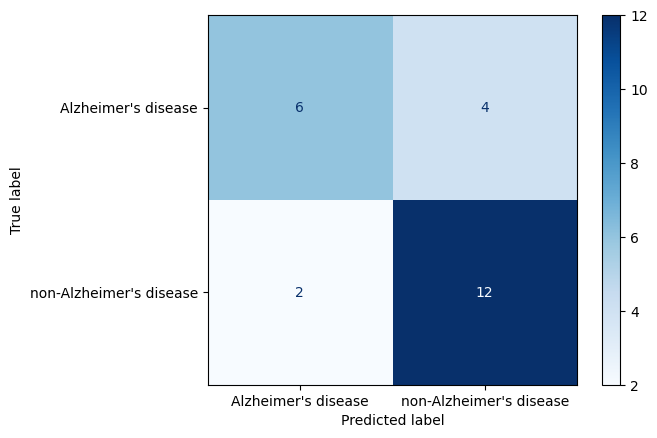

In [58]:
knn_cm = ConfusionMatrixDisplay.from_predictions(test_out, knn_pred_Y, display_labels=knn.classes_, cmap='Blues')
knn_cm

### Decision Tree

In [59]:
from sklearn import tree

tree_model = tree.DecisionTreeClassifier()
tree_model.fit(train_in, train_out)

tree_y_pred = tree_model.predict(test_in)

print('Precision: %0.2f' % precision_score(test_out, tree_y_pred, average='weighted'))
print('Recall: %0.2f' % recall_score(test_out, tree_y_pred, average='weighted'))
print('Accuracy: %0.2f' % accuracy_score(test_out, tree_y_pred))

Precision: 0.68
Recall: 0.67
Accuracy: 0.67


#### Confusion Matrix

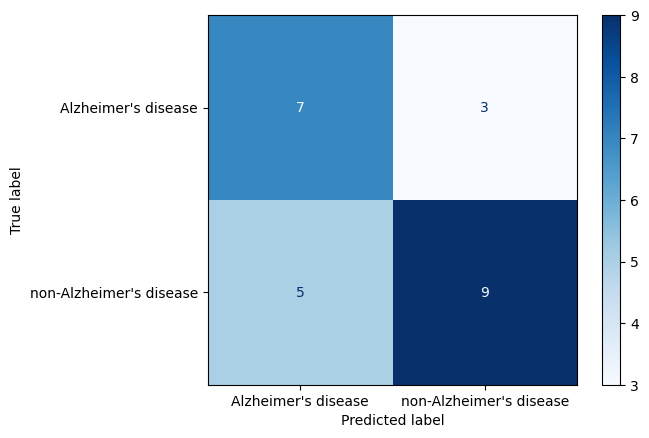

In [60]:
tree_cm = ConfusionMatrixDisplay.from_predictions(test_out, tree_y_pred, display_labels=tree_model.classes_, cmap='Blues')
tree_cm

### Naive-Bayes

In [61]:
from sklearn.naive_bayes import GaussianNB

gnb_model = GaussianNB()
gnb_model.fit(train_in, train_out)

gnb_y_pred = gnb_model.predict(test_in)

print('Precision: %0.2f' % precision_score(test_out, gnb_y_pred, average='weighted'))
print('Recall: %0.2f' % recall_score(test_out, gnb_y_pred, average='weighted'))
print('Accuracy: %0.2f' % accuracy_score(test_out, gnb_y_pred))


Precision: 0.71
Recall: 0.71
Accuracy: 0.71


#### Confusion Matrix

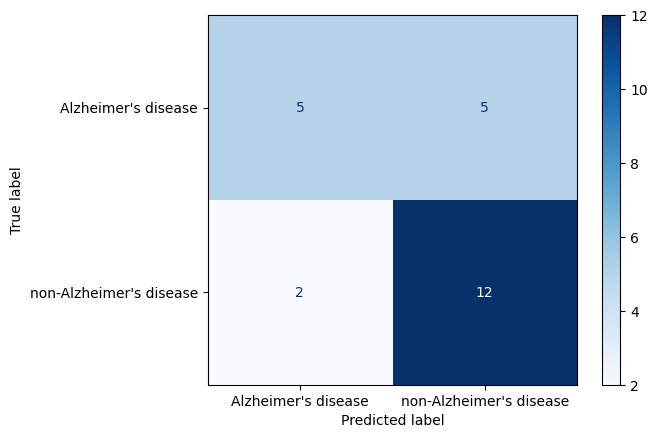

In [62]:
gnb_cm = ConfusionMatrixDisplay.from_predictions(test_out, gnb_y_pred, display_labels=gnb_model.classes_, cmap='Blues')
gnb_cm

### SVM

In [63]:
from sklearn import svm

svm_model = svm.SVC(kernel = "linear")
svm_model.fit(train_in, train_out)

svm_y_pred = svm_model.predict(test_in)

print('Precision: %0.2f' % precision_score(test_out, svm_y_pred, average='weighted'))
print('Recall: %0.2f' % recall_score(test_out, svm_y_pred, average='weighted'))
print('Accuracy: %0.2f' % accuracy_score(test_out, svm_y_pred))

Precision: 0.85
Recall: 0.79
Accuracy: 0.79


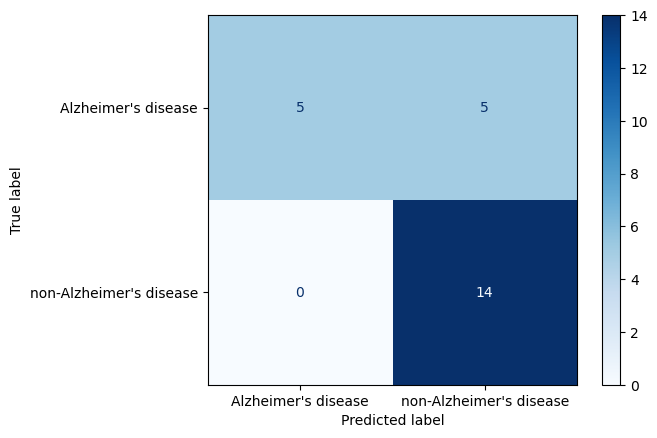

In [64]:
svm_cm = ConfusionMatrixDisplay.from_predictions(test_out, svm_y_pred, display_labels=svm_model.classes_, cmap='Blues')
svm_cm